# MSA 2024 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
# Read the CSV file 
data_unsorted = pd.read_csv('store_sales.csv', encoding='latin1',parse_dates=['Order Date','Ship Date'],infer_datetime_format=True)

# Sort the DataFrame by the 'Order Date' column
data_sorted = data_unsorted.sort_values(by='Order Date')

data=data_sorted
# Display the first 10 rows 
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.00,746.4078
1626,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.60,-53.7096
181,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.00,21.2954
150,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.00,3.0814
631,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.00,87.3504
1024,4939,CA-2014-157147,2014-01-13,2014-01-18,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,...,94109,West,FUR-BO-10003034,Furniture,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",333.999,3,0.15,3.9294
1355,6475,CA-2014-149524,2014-01-14,2014-01-15,First Class,BS-11590,Brendan Sweed,Corporate,United States,Philadelphia,...,19140,East,FUR-BO-10003433,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.960,4,0.50,-53.2856
200,971,CA-2014-115791,2014-01-16,2014-01-18,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.20,28.5984
1131,5466,CA-2014-146591,2014-01-19,2014-01-20,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,85254,West,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.470,5,0.70,-320.5970
1326,6328,CA-2014-167927,2014-01-20,2014-01-26,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.00,30.0234


Key figures for Sales is the following:
mean: 349.83488698726944
sd: 503.1791448146307
median: 182.22
Lower Quartile (25th percentile): 47.04
Upper Quartile (75th percentile): 435.168
max: 4416.174
min: 1.892


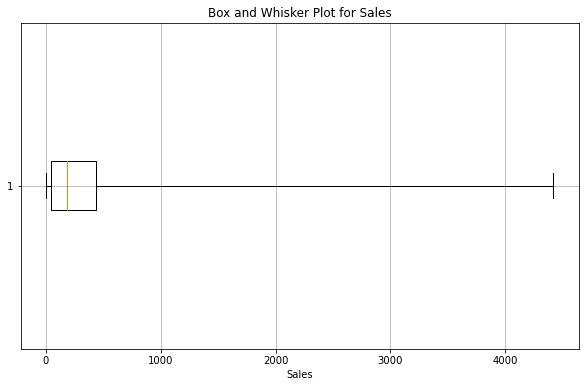

 
Key figures for Quantity is the following:
mean: 3.785007072135785
sd: 2.251620299696762
median: 3.0
Lower Quartile (25th percentile): 2.0
Upper Quartile (75th percentile): 5.0
max: 14
min: 1


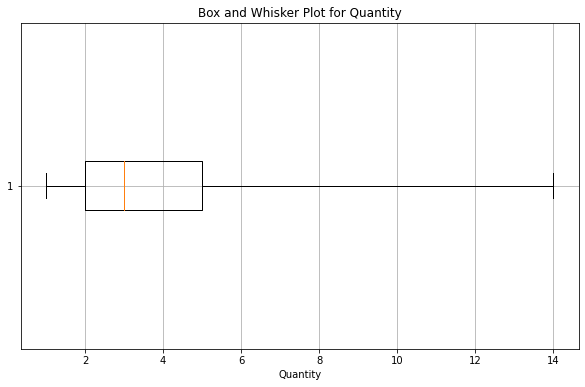

 
Key figures for Discount is the following:
mean: 0.1739226779820825
sd: 0.18154728491496447
median: 0.2
Lower Quartile (25th percentile): 0.0
Upper Quartile (75th percentile): 0.3
max: 0.7
min: 0.0


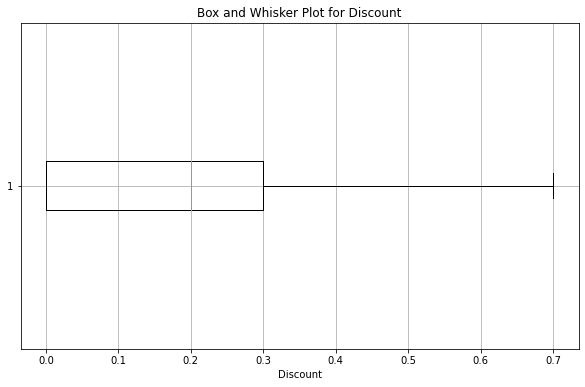

 
Key figures for Profit is the following:
mean: 8.699327109853852
sd: 136.04924643905224
median: 7.7748
Lower Quartile (25th percentile): -12.849
Upper Quartile (75th percentile): 33.7266
max: 1013.127
min: -1862.3124


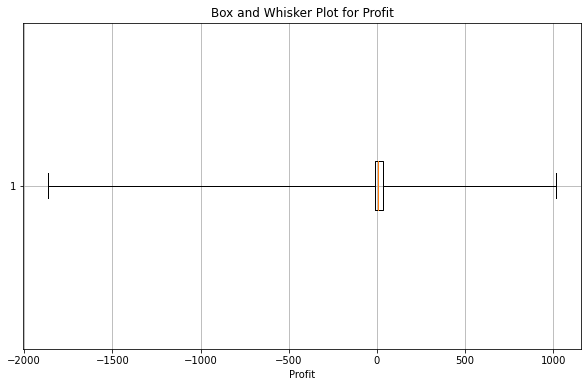

In [3]:
numerical = ['Sales','Quantity','Discount','Profit']
for n in numerical:
    #Print Key figues for numerical values
    print("Key figures for",n,"is the following:")
    print("mean:",data[n].mean())
    print("sd:",data[n].std())
    print("median:",data[n].median())
    quartiles = data[n].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles.loc[0.25]
    upper_quartile = quartiles.loc[0.75]
    print("Lower Quartile (25th percentile):", lower_quartile)
    print("Upper Quartile (75th percentile):", upper_quartile)
    print("max:",data[n].max())
    print("min:",data[n].min())
    #plot box and whisker for values above
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[n], vert=False, whis=[0, 100])
    plt.title('Box and Whisker Plot for ' + n)
    plt.xlabel(n)
    plt.grid(True)
    plt.show()
    print(" ")
    

## 2. Visualise Data

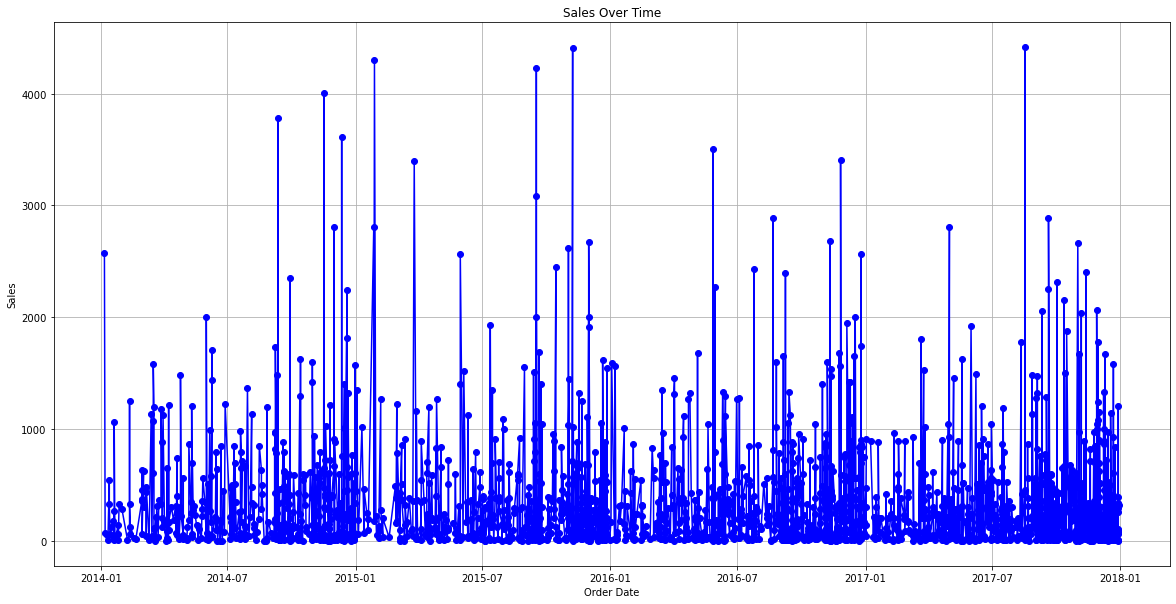

In [4]:
# Plot sales over time
plt.figure(figsize=(20, 10))  # width: 20 inches, height: 10 inches
plt.plot(data['Order Date'], data['Sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()



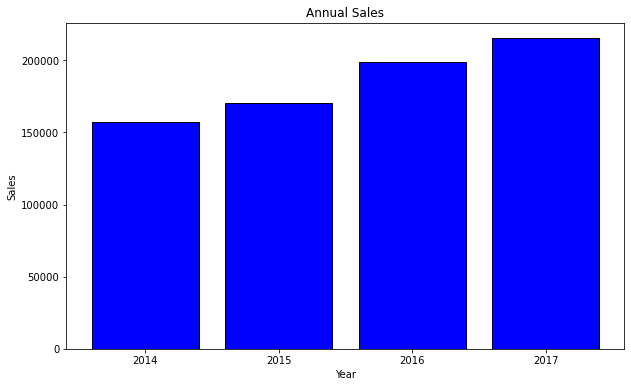

{2014: 157192.8531, 2015: 170518.2370000001, 2016: 198901.4360000002, 2017: 215387.26920000004}


In [5]:
#code snippet to get total sales for each year
sales_dict = {}
for index, row in data_unsorted.iterrows():
    year = row['Order Date'].year
    sales = row['Sales']
    if year not in sales_dict:
        sales_dict[year] = sales  # Initialise the sales for the year
    else:
        sales_dict[year] += sales  # Add sales to the existing year's total

sales_dict = dict(sorted(sales_dict.items())) #sort the sales dict by year

# Extracting keys (years) and values (sales) from dictionary
years = list(sales_dict.keys())
sales = list(sales_dict.values())

# Create bar plot
plt.figure(figsize=(10, 6))  
plt.bar(years, sales, color='blue', edgecolor='black')

# title and labels
plt.title('Annual Sales')
plt.xlabel('Year')
plt.ylabel('Sales')


plt.xticks(years)

# Display the plot
plt.show()
print(sales_dict)

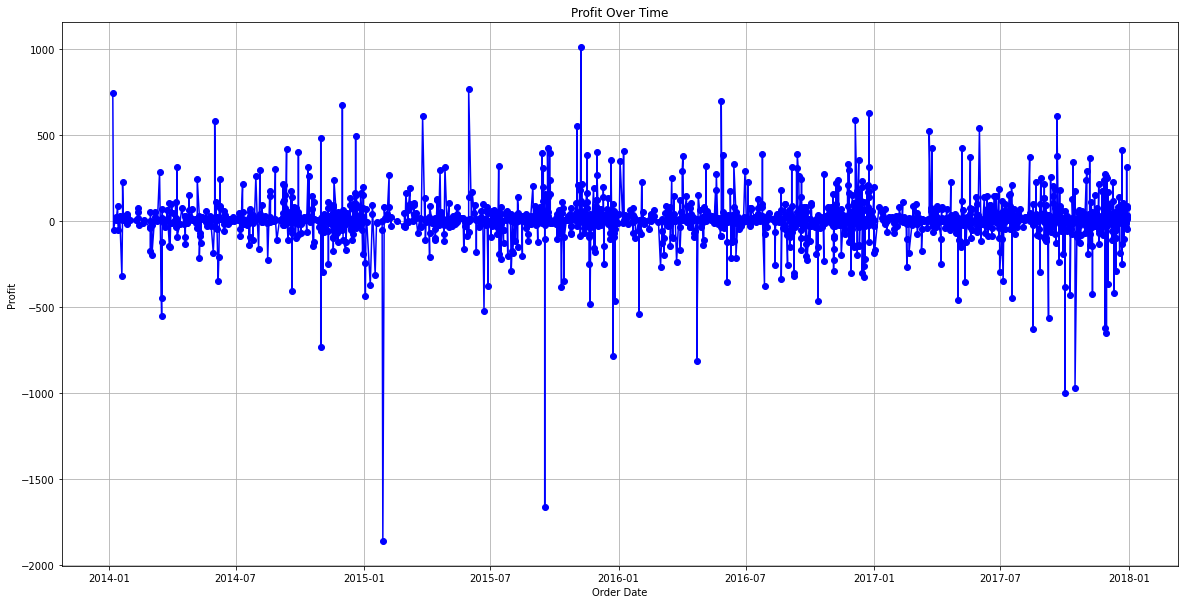

In [6]:
# Plot Profit over time
plt.figure(figsize=(20, 10))  # width: 20 inches, height: 10 inches
plt.plot(data['Order Date'], data['Profit'], marker='o', linestyle='-', color='b')
plt.title('Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.grid(True)
plt.show()




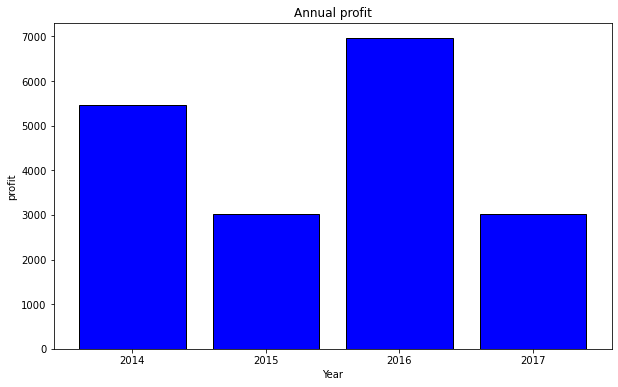

{2014: 5457.725500000006, 2015: 3015.2028999999993, 2016: 6959.953099999998, 2017: 3018.3912999999957}


In [7]:
#code snippet to get total profit for each year
profit_dict = {}
for index, row in data_unsorted.iterrows():
    year = row['Order Date'].year
    profit = row['Profit']
    if year not in profit_dict:
        profit_dict[year] = profit  # Initialise the profit for the year
    else:
        profit_dict[year] += profit  # Add profit to the existing year's total

profit_dict = dict(sorted(profit_dict.items())) #sort the profit dict by year


# Extracting keys (years) and values (profit) from dictionary
years = list(profit_dict.keys())
profit = list(profit_dict.values())

# Create bar plot
plt.figure(figsize=(10, 6))  
plt.bar(years, profit, color='blue', edgecolor='black')

# title and labels
plt.title('Annual profit')
plt.xlabel('Year')
plt.ylabel('profit')


plt.xticks(years)

# Display the plot
plt.show()

print(profit_dict)

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
data = data.drop(columns=['Row ID', 'Order ID',
       'Customer ID', 'Customer Name', 'Country', 
       'Postal Code', 'Product ID', 'Category', 
       'Product Name'])

# Columns to encode
columns_to_encode = ['Ship Mode',
        'Segment', 'City', 'State', 'Region', 'Sub-Category']



# Perform one-hot encoding to convert categorical to numeric
data_new = pd.get_dummies(data, columns=columns_to_encode)

    
data_new.head(10)

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,State_Wisconsin,State_Wyoming,Region_Central,Region_East,Region_South,Region_West,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
1577,2014-01-06,2014-01-10,2573.820,9,0.00,746.4078,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1626,2014-01-07,2014-01-12,76.728,3,0.60,-53.7096,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
181,2014-01-10,2014-01-15,51.940,1,0.00,21.2954,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
150,2014-01-11,2014-01-14,9.940,2,0.00,3.0814,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
631,2014-01-13,2014-01-16,545.940,6,0.00,87.3504,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1024,2014-01-13,2014-01-18,333.999,3,0.15,3.9294,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1355,2014-01-14,2014-01-15,61.960,4,0.50,-53.2856,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
200,2014-01-16,2014-01-18,127.104,6,0.20,28.5984,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1131,2014-01-19,2014-01-20,181.470,5,0.70,-320.5970,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1326,2014-01-20,2014-01-26,272.940,3,0.00,30.0234,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## 3. Clean data

In [10]:
#Remove null values if any
data_clean = data_new.dropna().reset_index(drop=True)

## 4. Identify correlated variables

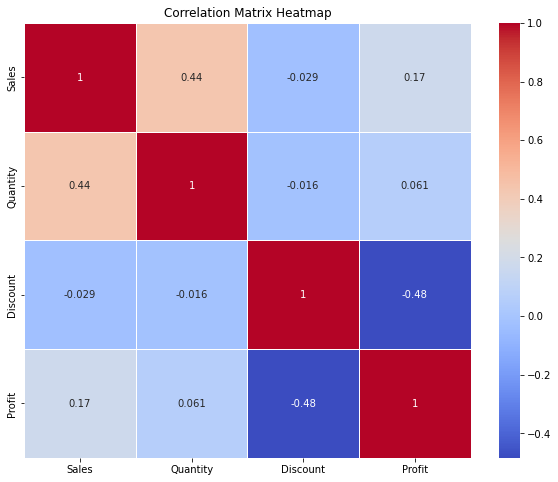

In [11]:
# Correaltion of numeric variables
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 5. Summary

In this Notebook, we have loaded the dataset containing sales of a furniture store from 2014-2018. I displayed the data; however, the dates were not organized, so I ordered it by OrderDate. Next, I wanted to get key details on some numeric variables ('Sales', 'Quantity', 'Discount', 'Profit'). With this information, I gained insights such as the distribution of these variables through a box and whisker graph. I noticed that Sales, Profit, and Quantity had very long whiskers, indicating there could be outliers. To clarify this further, I plotted the graphs for those numeric features.

I noticed Sales had many spikes, which could be due to seasonal discounts or other factors. Furthermore, I observed that Profit had fewer spikes and also included losses on some orders. In terms of annual profit, 2016 was their best-performing year with 6959.95, whereas 2015 and 2017 had lower profits with 3015.20 and $3018.39, respectively. With this key information in mind, all that was left was to clean the data for any null values and one-hot encode the categorical variables to convert them to numeric variables. Finally, with a heat map, I noticed that Discount had an inverse relationship with Profit, and Quantity had a direct relationship with Sales.

# MSA 2024 Phase 2 - Part 2

## 6. Load and split preprocessed data

In [12]:

#Convert Date time into  numceric dates for model
data_clean['Order Date'] = data_clean['Order Date'].astype('datetime64[ns]')
data_clean['Ship Date'] = data_clean['Ship Date'].astype('datetime64[ns]')

data_clean['Order Date'] = (data_clean['Order Date'] - pd.Timestamp("2000-01-01")) // pd.Timedelta('1D')
data_clean['Ship Date'] = (data_clean['Ship Date'] - pd.Timestamp("2000-01-01")) // pd.Timedelta('1D')


x = data_clean.drop('Sales', axis = 1) # Features
y = data_clean['Sales']  # Target

In [13]:
# Split the data into training and test sets 70/30 split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,shuffle=False)

## 7. Decsion Tree Regressor

In [14]:

# initialise Model
model = DecisionTreeRegressor(random_state = 101,max_depth = 8)

# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=101)

## 8.Train and test  model

In [15]:
#Get predictions
y_pred = model.predict(X_test)

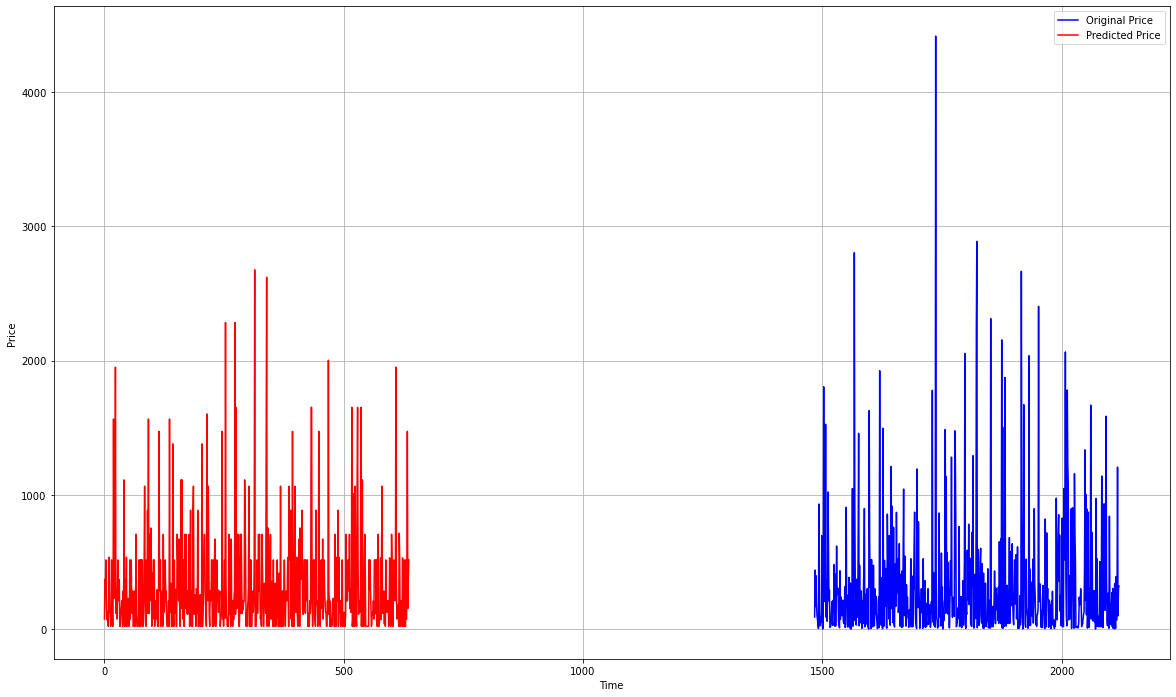

In [16]:
#Plot actual sales vs predicted 
plt.figure(figsize = (20,12))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 9.Evaluate the model

In [17]:
actual = y_test
predicted = y_pred

# Calculate MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Percentage Error (MAPE): 84.42878244409948


In [18]:
mse = mean_squared_error(actual, predicted)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 68117.21639600408


In [19]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 260.99275161583336


In [20]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_value = smape(actual, predicted)
print('Symmetric Mean Absolute Percentage Error (sMAPE):', smape_value)

Symmetric Mean Absolute Percentage Error (sMAPE): 49.772935447033234


## 10.Summary

After preporocessing, I split the model into a 70/30 train and test split, I didnt shuffle because I wanted to use the past sales and features to predict the future. I picked a decison tree regressor algorithm to predict values. I used depth 8 as it this would pick up on the spikes of the sales and not underfit. Then I ploted the predicrted vs actual sales, and it looks like based on visual the algorithm has underestimated sales and accounted for spikes, however In my opinion this would prepare a company to be prudent with their finances and it is better than overestimating. 

In terms of actual evaluation we have the following results. The performance metrics indicate the Decision Tree Regressor's predictions for store sales are not very accurate. With a high MAPE of 84.43% and sMAPE of 49.77%, the model shows significant prediction errors. The MSE of 68117.22 and RMSE of 260.99 suggest large discrepancies between predicted and actual values. This could be due to overfitting or the model's inability to capture the variability in sales data, like seasonal spikes. To improve accuracy,  I would need to consider feature engineering, regularization, exploring advanced models, and hyperparameter tuning. Implementing cross-validation can also help ensure the model generalises better to unseen data.